# Pokémon GO - Final Project:

Importando as bibliotecas:

In [22]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import os
from dotenv import load_dotenv
import json 

#### Lendo o arquivo:

In [23]:
poke = pd.read_csv('pokemon.csv')

#### Estudando o database:

In [24]:
poke.head()

number pokemon_name                                            pic_url  \
0       1    Bulbasaur  https://static.wikia.nocookie.net/pokemongo/im...   
1       2      Ivysaur  https://static.wikia.nocookie.net/pokemongo/im...   
2       3     Venusaur  https://static.wikia.nocookie.net/pokemongo/im...   
3       4   Charmander  https://static.wikia.nocookie.net/pokemongo/im...   
4       5   Charmeleon  https://static.wikia.nocookie.net/pokemongo/im...   

  main_type secondary_type region category height  weight     pokemon_family  \
0     Grass         Poison  Kanto     Seed  0.7 m  6.9 kg   Bulbasaur family   
1     Grass         Poison  Kanto     Seed    1 m   13 kg   Bulbasaur family   
2     Grass         Poison  Kanto     Seed    2 m  100 kg   Bulbasaur family   
3      Fire            NaN  Kanto   Lizard  0.6 m  8.5 kg  Charmander family   
4      Fire            NaN  Kanto    Flame  1.1 m   19 kg  Charmander family   

   ...                                         resistance  \
0  ...  {'62.5%': ['Electric', 'Fairy', 'Fighting', 'W...   
1  ...  {'62.5%': ['Electric', 'Fairy', 'Fighting', 'W...   
2  ...  {'62.5%': ['Electric', 'Fairy', 'Fighting', 'W...   
3  ...  {'62.5%': ['Bug', 'Fairy', 'Fire', 'Grass', 'I...   
4  ...  {'62.5%': ['Bug', 'Fairy', 'Fire', 'Grass', 'I...   

                                         weakness  wild_avail egg_avail  \
0  {'160%': ['Fire', 'Flying', 'Ice', 'Psychic']}        Yes         No   
1  {'160%': ['Fire', 'Flying', 'Ice', 'Psychic']}        Yes         No   
2  {'160%': ['Fire', 'Flying', 'Ice', 'Psychic']}        Yes         No   
3           {'160%': ['Ground', 'Rock', 'Water']}        Yes         No   
4           {'160%': ['Ground', 'Rock', 'Water']}        Yes         No   

                   raid_avail research_avail shiny shadow  \
0  Formerly  (1st tier level)           Yes    Yes    Yes   
1  Formerly  (1st tier level)             No   Yes    Yes   
2  Formerly  (3rd tier level)      Formerly    Yes    Yes   
3  Formerly  (1st tier level)           Yes    Yes    Yes   
4  Formerly  (2nd tier level)      Formerly    Yes    Yes   

                                         pkedex_desc  \
0  Bulbasaur can be seen napping in bright sunlig...   
1  There is a bud on this Pokémon's back. To supp...   
2  Standard Pokédex description\nThere is a large...   
3  The flame that burns at the tip of its tail is...   
4  Charmeleon mercilessly destroys its foes using...   

                                        poss_attacks  
0  ['Tackle', 'Vine Whip', 'Power Whip', 'Seed Bo...  
1  ['Razor Leaf', 'Vine Whip', 'Power Whip', 'Slu...  
2  ['Razor Leaf', 'Vine Whip', 'Petal Blizzard', ...  
3  ['Ember', 'Scratch', 'Flame Burst', 'Flame Cha...  
4  ['Ember', 'Fire Fang', 'Scratch', 'Fire Punch'...  

[5 rows x 29 columns]

In [25]:
poke.shape

(770, 29)

In [26]:
poke.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   number          770 non-null    int64 
 1   pokemon_name    770 non-null    object
 2   pic_url         770 non-null    object
 3   main_type       770 non-null    object
 4   secondary_type  376 non-null    object
 5   region          770 non-null    object
 6   category        770 non-null    object
 7   height          770 non-null    object
 8   weight          770 non-null    object
 9   pokemon_family  770 non-null    object
 10  attack          770 non-null    int64 
 11  defense         770 non-null    int64 
 12  stamina         770 non-null    int64 
 13  cp_range        770 non-null    object
 14  hp_range        770 non-null    object
 15  capture_rate    700 non-null    object
 16  flee_rate       700 non-null    object
 17  male_perc       611 non-null    object
 18  female_per

In [27]:
poke.main_type.value_counts()

Water       111
Normal      105
Grass        72
Bug          63
Fire         51
Psychic      48
Rock         43
Electric     37
Ground       31
Poison       30
Dark         30
Fighting     28
Dragon       27
Steel        25
Ice          24
Ghost        23
Fairy        19
Flying        3
Name: main_type, dtype: int64

<AxesSubplot:>

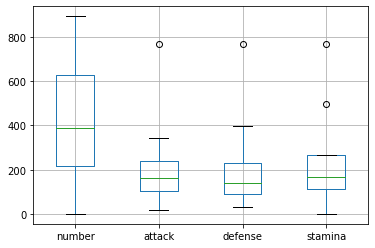

In [28]:
poke.describe().boxplot()

### Ajustando a coluna de peso e altura:
    Retirando os KG e M do df para transformar em float64 e int

In [29]:
poke['height'] = poke['height'].str.rstrip('m')
poke['weight'] = poke['weight'].str.rstrip('kg')

In [30]:
poke['height'] = pd.to_numeric(poke['height'],errors = 'coerce')
poke['weight'] = pd.to_numeric(poke['weight'],errors = 'coerce')

### Ajustando a coluna de CP Range:
    Separando os pontos de combate em mínimo e maxímo. 

In [31]:
poke.cp_range.unique() #Verificando os valores separados.

array(['12-1,115', '19-1,699', '33-2,720', '10-980', '19-1,653',
       '35-2,889', '10-946', '17-1,488', '29-2,466', '10-437', '10-450',
       '21-1,827', '10-456', '10-432', '21-1,846', '10-680', '13-1,194',
       '25-2,129', '10-734', '20-1,730', '10-798', '23-1,997', '10-927',
       '22-1,921', '10-938', '26-2,182', '14-1,261', '28-2,374', '10-816',
       '14-1,309', '30-2,488', '10-860', '15-1,393', '31-2,567',
       '12-1,155', '29-2,437', '10-883', '27-2,279', '10-724', '22-1,926',
       '10-667', '23-1,976', '13-1,228', '19-1,681', '31-2,559',
       '11-1,018', '21-1,859', '11-1,004', '24-2,082', '10-676',
       '17-1,557', '10-748', '19-1,689', '12-1,106', '29-2,450',
       '12-1,164', '27-2,288', '14-1,243', '37-3,029', '10-829',
       '16-1,419', '31-2,586', '15-1,342', '24-2,059', '37-3,057',
       '14-1,278', '24-2,031', '37-3,056', '11-1,033', '18-1,611',
       '29-2,431', '11-1,040', '29-2,422', '14-1,293', '22-1,897',
       '36-2,949', '19-1,697', '29-2,461

In [32]:
poke[['CP_Min', 'CP_Max']] = poke['cp_range'].str.split('-', expand=True)

In [33]:
poke['CP_Max'] = poke.CP_Max.apply(lambda x: x.replace(',', ''))
poke['CP_Min'] = poke.CP_Max.apply(lambda x: x.replace(',', ''))

In [34]:
poke['CP_Min'] = pd.to_numeric(poke['CP_Min'],errors = 'coerce')
poke['CP_Max'] = pd.to_numeric(poke['CP_Max'],errors = 'coerce')

### Ajustando a coluna de HP range e separando em mínimo e máximo:

In [35]:
poke.hp_range

0      12-113
1      14-134
2      17-162
3      11-105
4      14-131
        ...  
765    14-131
766    15-140
767    18-163
768    18-163
769    21-195
Name: hp_range, Length: 770, dtype: object

In [36]:
poke[['HP_Min', 'HP_Max']] = poke['hp_range'].str.split('-', expand=True)

In [37]:
poke['HP_Min'] = pd.to_numeric(poke['HP_Min'],errors = 'coerce')
poke['HP_Max'] = pd.to_numeric(poke['HP_Max'],errors = 'coerce')

### Porcentagem do pokémon ser/nascer macho ou fêmea 
##### Substituir o % do dado para evitar problemas futuros:

In [38]:
poke['Porcentagem_masculino'] = pd.to_numeric(poke['male_perc'].str.replace('%',' '))
poke['Porcentagem_feminino'] = pd.to_numeric(poke['female_perc'].str.replace('%',' '))

### Porcentagem de captura do pokémon 
##### Substituir o % do dado para evitar problemas futuros:

In [39]:
poke['Tx_captura'] = pd.to_numeric(poke['capture_rate'].str.replace('%',' '))

In [40]:
poke['Tx_captura']

0      20.0
1      10.0
2       5.0
3      20.0
4      10.0
       ... 
765    10.0
766    20.0
767     2.0
768     2.0
769     NaN
Name: Tx_captura, Length: 770, dtype: float64

### Verificando o dicionário que está dentro da coluna de WEAKNESS:
##### Separando o dicionário em colunas distintas com seus valores para serem utilizados no futuro.

In [41]:
poke[poke.weakness.isnull()]['weakness']

723    NaN
726    NaN
738    NaN
739    NaN
742    NaN
743    NaN
749    NaN
750    NaN
Name: weakness, dtype: object

In [42]:
def altera_dict(row):
    try:
        row =  json.loads(row.replace("\'", "\""))
        dict_poke = {}
        for valor, list_elemento in row.items():
            for elemento in list_elemento:
                dict_poke[elemento] = valor
        return dict_poke
    except:
        return {'0':'0%'}

#aplica na coluna
poke['weakness'] = poke['weakness'].apply(altera_dict)

#separa os elementos em colunas
for row in range(poke.shape[0]):
    for elemento, fraqueza in poke['weakness'][row].items():
        poke.loc[row, elemento+'_weakness'] = - int(fraqueza.replace('%',''))


In [43]:
poke

number pokemon_name                                            pic_url  \
0         1    Bulbasaur  https://static.wikia.nocookie.net/pokemongo/im...   
1         2      Ivysaur  https://static.wikia.nocookie.net/pokemongo/im...   
2         3     Venusaur  https://static.wikia.nocookie.net/pokemongo/im...   
3         4   Charmander  https://static.wikia.nocookie.net/pokemongo/im...   
4         5   Charmeleon  https://static.wikia.nocookie.net/pokemongo/im...   
..      ...          ...                                                ...   
765     867    Runerigus  https://static.wikia.nocookie.net/pokemongo/im...   
766     870      Falinks  https://static.wikia.nocookie.net/pokemongo/im...   
767     888       Zacian  data:image/gif;base64,R0lGODlhAQABAIABAAAAAP//...   
768     889    Zamazenta  data:image/gif;base64,R0lGODlhAQABAIABAAAAAP//...   
769     893       Zarude  data:image/gif;base64,R0lGODlhAQABAIABAAAAAP//...   

    main_type secondary_type region   category  height  weight  \
0       Grass         Poison  Kanto       Seed     0.7     6.9   
1       Grass         Poison  Kanto       Seed     1.0    13.0   
2       Grass         Poison  Kanto       Seed     2.0   100.0   
3        Fire            NaN  Kanto     Lizard     0.6     8.5   
4        Fire            NaN  Kanto      Flame     1.1    19.0   
..        ...            ...    ...        ...     ...     ...   
765    Ground          Ghost  Galar     Grudge     1.6    66.6   
766  Fighting            NaN  Galar  Formation     3.0    62.0   
767     Fairy            NaN  Galar    Warrior     2.8   110.0   
768  Fighting            NaN  Galar    Warrior     2.9   210.0   
769      Dark          Grass  Galar      Rogue     1.8    70.0   

        pokemon_family  ...  Grass_weakness  Fighting_weakness  \
0     Bulbasaur family  ...             NaN                NaN   
1     Bulbasaur family  ...             NaN                NaN   
2     Bulbasaur family  ...             NaN                NaN   
3    Charmander family  ...             NaN                NaN   
4    Charmander family  ...             NaN                NaN   
..                 ...  ...             ...                ...   
765      Yamask family  ...          -160.0                NaN   
766     Falinks family  ...             NaN                NaN   
767      Zacian family  ...             NaN                NaN   
768   Zamazenta family  ...             NaN                NaN   
769      Zarude family  ...             NaN             -160.0   

     Poison_weakness Steel_weakness Bug_weakness Fairy_weakness Dark_weakness  \
0                NaN            NaN          NaN            NaN           NaN   
1                NaN            NaN          NaN            NaN           NaN   
2                NaN            NaN          NaN            NaN           NaN   
3                NaN            NaN          NaN            NaN           NaN   
4                NaN            NaN          NaN            NaN           NaN   
..               ...            ...          ...            ...           ...   
765              NaN            NaN          NaN            NaN        -160.0   
766              NaN            NaN          NaN         -160.0           NaN   
767           -160.0         -160.0          NaN            NaN           NaN   
768              NaN            NaN          NaN         -160.0           NaN   
769           -160.0            NaN       -256.0         -160.0           NaN   

    Ghost_weakness Dragon_weakness 0_weakness  
0              NaN             NaN        NaN  
1              NaN             NaN        NaN  
2              NaN             NaN        NaN  
3              NaN             NaN        NaN  
4              NaN             NaN        NaN  
..             ...             ...        ...  
765         -160.0             NaN        NaN  
766            NaN             NaN        NaN  
767            NaN             NaN        NaN  
768            Na

### Verificando o dicionário que está dentro da coluna de RESISTANCE:
##### Separando o dicionário em colunas distintas com seus valores para serem utilizados no futuro.

In [44]:
poke[poke.resistance.isnull()]['resistance']  #Verificando valores ISNULL

723    NaN
726    NaN
738    NaN
739    NaN
742    NaN
743    NaN
749    NaN
750    NaN
Name: resistance, dtype: object

In [45]:
poke.resistance #Verificando a coluna como está dividida

0      {'62.5%': ['Electric', 'Fairy', 'Fighting', 'W...
1      {'62.5%': ['Electric', 'Fairy', 'Fighting', 'W...
2      {'62.5%': ['Electric', 'Fairy', 'Fighting', 'W...
3      {'62.5%': ['Bug', 'Fairy', 'Fire', 'Grass', 'I...
4      {'62.5%': ['Bug', 'Fairy', 'Fire', 'Grass', 'I...
                             ...                        
765    {'62.5%': ['Bug', 'Rock'], '39%': ['Electric',...
766                   {'62.5%': ['Bug', 'Dark', 'Rock']}
767    {'62.5%': ['Bug', 'Dark', 'Fighting'], '39%': ...
768                   {'62.5%': ['Bug', 'Dark', 'Rock']}
769    {'62.5%': ['Dark', 'Electric', 'Ghost', 'Grass...
Name: resistance, Length: 770, dtype: object

In [46]:
def altera_dict(row):
    try:
        row =  json.loads(row.replace("\'", "\""))
        dict_poke = {}
        for valor, list_elemento in row.items():
            for elemento in list_elemento:
                dict_poke[elemento] = valor
        return dict_poke
    except:
        return {'0':'0%'}

#aplica na coluna
poke['resistance'] = poke['resistance'].apply(altera_dict)

#separa os elementos em colunas
for row in range(poke.shape[0]):
    for elemento, resistencia in poke['resistance'][row].items():
        poke.loc[row, elemento+'_resistance'] = float(resistencia.replace('%',''))


In [47]:
display(poke.sample(10))

number pokemon_name                                            pic_url  \
501     502       Dewott  https://static.wikia.nocookie.net/pokemongo/im...   
691     692    Clauncher  https://static.wikia.nocookie.net/pokemongo/im...   
515     516     Simipour  https://static.wikia.nocookie.net/pokemongo/im...   
174     175       Togepi  https://static.wikia.nocookie.net/pokemongo/im...   
206     207       Gligar  https://static.wikia.nocookie.net/pokemongo/im...   
641     642    Thundurus  https://static.wikia.nocookie.net/pokemongo/im...   
196     197      Umbreon  https://static.wikia.nocookie.net/pokemongo/im...   
259     260     Swampert  https://static.wikia.nocookie.net/pokemongo/im...   
101     102    Exeggcute  https://static.wikia.nocookie.net/pokemongo/im...   
563     564     Tirtouga  https://static.wikia.nocookie.net/pokemongo/im...   

    main_type secondary_type region     category  height  weight  \
501     Water            NaN  Unova   Discipline    0.80    24.5   
691     Water            NaN  Kalos        Water    0.50     8.3   
515     Water            NaN  Unova       Geyser    1.00    29.0   
174     Fairy            NaN  Johto        Spike    0.30     1.5   
206    Ground         Flying  Johto          Fly    1.09    64.8   
641  Electric         Flying  Unova         Bolt    1.50    61.0   
196      Dark            NaN  Johto    Moonlight    0.99    27.0   
259     Water         Ground  Hoenn          Mud    1.50    81.9   
101     Grass        Psychic  Kanto          Egg    0.40     2.5   
563     Water           Rock  Unova  Prototurtle    0.70    16.5   

       pokemon_family  ...  Ground_resistance  Poison_resistance  \
501   Oshawott family  ...                NaN                NaN   
691  Clauncher family  ...                NaN                NaN   
515    Panpour family  ...                NaN                NaN   
174     Togepi family  ...                NaN                NaN   
206     Gligar family  ...               39.0               62.5   
641  Thundurus family  ...               62.5                NaN   
196      Eevee family  ...                NaN                NaN   
259     Mudkip family  ...                NaN               62.5   
101  Exeggcute family  ...               62.5                NaN   
563   Tirtouga family  ...                NaN               62.5   

     Ghost_resistance Flying_resistance Rock_resistance Dark_resistance  \
501               NaN               NaN             NaN             NaN   
691               NaN               NaN             NaN             NaN   
515               NaN               NaN             NaN             NaN   
174               NaN               NaN             NaN            62.5   
206               NaN               NaN             NaN             NaN   
641               NaN              62.5             NaN             NaN   
196              62.5               NaN             NaN            62.5   
259               NaN               NaN            62.5             NaN   
101               NaN               NaN             NaN             NaN   
563               NaN              62.5             NaN             NaN   

    Dragon_resistance Psychic_resistance Normal_resistance 0_resistance  
501               NaN                NaN               NaN          NaN  
691               NaN                NaN               NaN          NaN  
515               NaN                NaN               NaN          NaN  
174              39.0                NaN               NaN          NaN  
206               NaN                NaN               NaN          NaN  
641               NaN                NaN               NaN          NaN  
196               NaN               39.0               NaN          NaN  
259               NaN                NaN               NaN          NaN  
101               NaN               62.5               NaN          NaN  
563               NaN                NaN              62.5          NaN

In [48]:
occur = poke.groupby(['egg_avail']).size()
occur

egg_avail
No                        726
Yes (10-km Eggs)           12
Yes (12-km Eggs)           11
Yes (2-km Eggs)            11
Yes (5-km Eggs)             9
Yes (Native 5-km Eggs)      1
dtype: int64

In [49]:
occur2 = poke.groupby(['raid_avail','egg_avail','research_avail']).size()
occur2

raid_avail                  egg_avail               research_avail
Formerly  (1st tier level)  No                      Formerly          130
                                                    No                 13
                                                    Yes                35
                            Yes (10-km Eggs)        Formerly            4
                            Yes (12-km Eggs)        Formerly            5
                                                    No                  1
                            Yes (2-km Eggs)         Formerly            7
                                                    Yes                 2
                            Yes (5-km Eggs)         Formerly            1
Formerly  (2nd tier level)  No                      Formerly           11
                                                    No                  8
                                                    Yes                 3
Formerly  (3rd tier level)  No               

In [50]:
poke.poss_attacks.unique()

array(["['Tackle', 'Vine Whip', 'Power Whip', 'Seed Bomb', 'Sludge Bomb']",
       "['Razor Leaf', 'Vine Whip', 'Power Whip', 'Sludge Bomb', 'Solar Beam']",
       "['Razor Leaf', 'Vine Whip', 'Petal Blizzard', 'Sludge Bomb', 'Solar Beam', 'Frenzy Plant']",
       "['Ember', 'Scratch', 'Flame Burst', 'Flame Charge', 'Flamethrower']",
       "['Ember', 'Fire Fang', 'Scratch', 'Fire Punch', 'Flame Burst', 'Flamethrower']",
       "['Air Slash', 'Fire Spin', 'Dragon Breath', 'Ember', 'Wing Attack', 'Dragon Claw', 'Fire Blast', 'Overheat', 'Blast Burn', 'Flamethrower']",
       "['Bubble', 'Tackle', 'Aqua Jet', 'Aqua Tail', 'Water Pulse']",
       "['Bite', 'Water Gun', 'Aqua Jet', 'Hydro Pump', 'Ice Beam']",
       "['Bite', 'Water Gun', 'Flash Cannon', 'Hydro Pump', 'Ice Beam', 'Skull Bash', 'Hydro Cannon']",
       "['Bug Bite', 'Tackle', 'Struggle']",
       "['Confusion', 'Struggle Bug', 'Bug Bite', 'Bug Buzz', 'Psychic', 'Signal Beam']",
       "['Bug Bite', 'Poison Sting', 'Struggle

In [51]:
poke['poss_attacks'] = poke['poss_attacks'].apply(lambda x: x.replace('[\'','').replace('\']','').replace('\', \'','|').split('|'))

### Criando um DF copia para tratar os dados da String para LIST:

In [52]:
poke_copy = poke[['pokemon_name','poss_attacks']].copy()
poke_copy

pokemon_name                                       poss_attacks
0      Bulbasaur  [Tackle, Vine Whip, Power Whip, Seed Bomb, Slu...
1        Ivysaur  [Razor Leaf, Vine Whip, Power Whip, Sludge Bom...
2       Venusaur  [Razor Leaf, Vine Whip, Petal Blizzard, Sludge...
3     Charmander  [Ember, Scratch, Flame Burst, Flame Charge, Fl...
4     Charmeleon  [Ember, Fire Fang, Scratch, Fire Punch, Flame ...
..           ...                                                ...
765    Runerigus      [Astonish, Rock Tomb, Sand Tomb, Shadow Ball]
766      Falinks  [Counter, Rock Smash, Brick Break, Megahorn, S...
767       Zacian  [Fire Fang, Metal Claw, Quick Attack, Snarl, C...
768    Zamazenta  [Ice Fang, Metal Claw, Quick Attack, Snarl, Cl...
769       Zarude  [Bite, Vine Whip, Dark Pulse, Energy Ball, Pow...

[770 rows x 2 columns]

In [53]:
#poke_copy['poss_attacks'] = poke_copy['poss_attacks'].apply(lambda x: x.replace('[\'','').replace('\']','').replace('\', \'','|').split('|'))
# Não deu certo porque já tratei acima. 

In [54]:
poke_copy

pokemon_name                                       poss_attacks
0      Bulbasaur  [Tackle, Vine Whip, Power Whip, Seed Bomb, Slu...
1        Ivysaur  [Razor Leaf, Vine Whip, Power Whip, Sludge Bom...
2       Venusaur  [Razor Leaf, Vine Whip, Petal Blizzard, Sludge...
3     Charmander  [Ember, Scratch, Flame Burst, Flame Charge, Fl...
4     Charmeleon  [Ember, Fire Fang, Scratch, Fire Punch, Flame ...
..           ...                                                ...
765    Runerigus      [Astonish, Rock Tomb, Sand Tomb, Shadow Ball]
766      Falinks  [Counter, Rock Smash, Brick Break, Megahorn, S...
767       Zacian  [Fire Fang, Metal Claw, Quick Attack, Snarl, C...
768    Zamazenta  [Ice Fang, Metal Claw, Quick Attack, Snarl, Cl...
769       Zarude  [Bite, Vine Whip, Dark Pulse, Energy Ball, Pow...

[770 rows x 2 columns]

## Tratamento das imagens que estavam quebradas:

In [55]:
for x in poke[~poke.pic_url.apply(lambda x: x.startswith('https://'))].pic_url: 
    print(x)

data:image/gif;base64,R0lGODlhAQABAIABAAAAAP///yH5BAEAAAEALAAAAAABAAEAQAICTAEAOw%3D%3D
data:image/gif;base64,R0lGODlhAQABAIABAAAAAP///yH5BAEAAAEALAAAAAABAAEAQAICTAEAOw%3D%3D
data:image/gif;base64,R0lGODlhAQABAIABAAAAAP///yH5BAEAAAEALAAAAAABAAEAQAICTAEAOw%3D%3D
data:image/gif;base64,R0lGODlhAQABAIABAAAAAP///yH5BAEAAAEALAAAAAABAAEAQAICTAEAOw%3D%3D
data:image/gif;base64,R0lGODlhAQABAIABAAAAAP///yH5BAEAAAEALAAAAAABAAEAQAICTAEAOw%3D%3D
data:image/gif;base64,R0lGODlhAQABAIABAAAAAP///yH5BAEAAAEALAAAAAABAAEAQAICTAEAOw%3D%3D
data:image/gif;base64,R0lGODlhAQABAIABAAAAAP///yH5BAEAAAEALAAAAAABAAEAQAICTAEAOw%3D%3D
data:image/gif;base64,R0lGODlhAQABAIABAAAAAP///yH5BAEAAAEALAAAAAABAAEAQAICTAEAOw%3D%3D


In [56]:
poke[~poke.pic_url.apply(lambda x: x.startswith('https://'))]

number pokemon_name                                            pic_url  \
665     666     Vivillon  data:image/gif;base64,R0lGODlhAQABAIABAAAAAP//...   
678     679      Honedge  data:image/gif;base64,R0lGODlhAQABAIABAAAAAP//...   
680     681    Aegislash  data:image/gif;base64,R0lGODlhAQABAIABAAAAAP//...   
718     719      Diancie  data:image/gif;base64,R0lGODlhAQABAIABAAAAAP//...   
720     721    Volcanion  data:image/gif;base64,R0lGODlhAQABAIABAAAAAP//...   
767     888       Zacian  data:image/gif;base64,R0lGODlhAQABAIABAAAAAP//...   
768     889    Zamazenta  data:image/gif;base64,R0lGODlhAQABAIABAAAAAP//...   
769     893       Zarude  data:image/gif;base64,R0lGODlhAQABAIABAAAAAP//...   

    main_type secondary_type region category  height  weight  \
665       Bug         Flying  Kalos    Scale     1.2    17.0   
678     Steel          Ghost  Kalos    Sword     0.8     2.0   
680     Steel          Ghost  Kalos    Royal     1.7    53.0   
718      Rock          Fairy  Kalos    Jewel     0.7     8.8   
720      Fire          Water  Kalos    Steam     1.7   195.0   
767     Fairy            NaN  Galar  Warrior     2.8   110.0   
768  Fighting            NaN  Galar  Warrior     2.9   210.0   
769      Dark          Grass  Galar    Rogue     1.8    70.0   

        pokemon_family  ...  Ground_resistance  Poison_resistance  \
665  Scatterbug family  ...               24.0                NaN   
678     Honedge family  ...                NaN               24.0   
680     Honedge family  ...                NaN               24.0   
718     Diancie family  ...                NaN                NaN   
720   Volcanion family  ...                NaN                NaN   
767      Zacian family  ...                NaN                NaN   
768   Zamazenta family  ...                NaN                NaN   
769      Zarude family  ...               62.5                NaN   

     Ghost_resistance Flying_resistance Rock_resistance Dark_resistance  \
665               NaN               NaN             NaN             NaN   
678               NaN              62.5            62.5             NaN   
680               NaN              62.5            62.5             NaN   
718               NaN              62.5             NaN            62.5   
720               NaN               NaN             NaN             NaN   
767               NaN               NaN             NaN            62.5   
768               NaN               NaN            62.5            62.5   
769              62.5               NaN             NaN            62.5   

    Dragon_resistance Psychic_resistance Normal_resistance 0_resistance  
665               NaN                NaN               NaN          NaN  
678              62.5               62.5              24.0          NaN  
680              62.5               62.5              24.0          NaN  
718              39.0                NaN              62.5          NaN  
720               NaN                NaN               NaN          NaN  
767              39.0                NaN               NaN          NaN  
768               NaN                NaN               NaN          NaN  
769               NaN               39.0               NaN          NaN  

[8 rows x 73 columns]

In [57]:
poke[poke.pic_url.apply(lambda x: x.startswith('https://'))].pic_url[1]

'https://static.wikia.nocookie.net/pokemongo/images/8/86/Ivysaur.png'

In [58]:
poke[~poke.pic_url.apply(lambda x: x.startswith('https://'))]

number pokemon_name                                            pic_url  \
665     666     Vivillon  data:image/gif;base64,R0lGODlhAQABAIABAAAAAP//...   
678     679      Honedge  data:image/gif;base64,R0lGODlhAQABAIABAAAAAP//...   
680     681    Aegislash  data:image/gif;base64,R0lGODlhAQABAIABAAAAAP//...   
718     719      Diancie  data:image/gif;base64,R0lGODlhAQABAIABAAAAAP//...   
720     721    Volcanion  data:image/gif;base64,R0lGODlhAQABAIABAAAAAP//...   
767     888       Zacian  data:image/gif;base64,R0lGODlhAQABAIABAAAAAP//...   
768     889    Zamazenta  data:image/gif;base64,R0lGODlhAQABAIABAAAAAP//...   
769     893       Zarude  data:image/gif;base64,R0lGODlhAQABAIABAAAAAP//...   

    main_type secondary_type region category  height  weight  \
665       Bug         Flying  Kalos    Scale     1.2    17.0   
678     Steel          Ghost  Kalos    Sword     0.8     2.0   
680     Steel          Ghost  Kalos    Royal     1.7    53.0   
718      Rock          Fairy  Kalos    Jewel     0.7     8.8   
720      Fire          Water  Kalos    Steam     1.7   195.0   
767     Fairy            NaN  Galar  Warrior     2.8   110.0   
768  Fighting            NaN  Galar  Warrior     2.9   210.0   
769      Dark          Grass  Galar    Rogue     1.8    70.0   

        pokemon_family  ...  Ground_resistance  Poison_resistance  \
665  Scatterbug family  ...               24.0                NaN   
678     Honedge family  ...                NaN               24.0   
680     Honedge family  ...                NaN               24.0   
718     Diancie family  ...                NaN                NaN   
720   Volcanion family  ...                NaN                NaN   
767      Zacian family  ...                NaN                NaN   
768   Zamazenta family  ...                NaN                NaN   
769      Zarude family  ...               62.5                NaN   

     Ghost_resistance Flying_resistance Rock_resistance Dark_resistance  \
665               NaN               NaN             NaN             NaN   
678               NaN              62.5            62.5             NaN   
680               NaN              62.5            62.5             NaN   
718               NaN              62.5             NaN            62.5   
720               NaN               NaN             NaN             NaN   
767               NaN               NaN             NaN            62.5   
768               NaN               NaN            62.5            62.5   
769              62.5               NaN             NaN            62.5   

    Dragon_resistance Psychic_resistance Normal_resistance 0_resistance  
665               NaN                NaN               NaN          NaN  
678              62.5               62.5              24.0          NaN  
680              62.5               62.5              24.0          NaN  
718              39.0                NaN              62.5          NaN  
720               NaN                NaN               NaN          NaN  
767              39.0                NaN               NaN          NaN  
768               NaN                NaN               NaN          NaN  
769               NaN               39.0               NaN          NaN  

[8 rows x 73 columns]

In [59]:
poke.loc[665,'pic_url'] = "https://assets.pokemon.com/assets/cms2/img/pokedex/full/666.png" #Vivillon 

In [60]:
poke.loc[678,'pic_url'] = "https://assets.pokemon.com/assets/cms2/img/pokedex/full/679.png" #Honedge
poke.loc[680,'pic_url'] = "https://assets.pokemon.com/assets/cms2/img/pokedex/full/681.png" #Aegislash
poke.loc[718,'pic_url'] = "https://assets.pokemon.com/assets/cms2/img/pokedex/full/719.png" #Diancie
poke.loc[720,'pic_url'] = "https://assets.pokemon.com/assets/cms2/img/pokedex/full/721.png" #Volcanion
poke.loc[767,'pic_url'] = "https://assets.pokemon.com/assets/cms2/img/pokedex/full/888.png" #Zacian
poke.loc[768,'pic_url'] = "https://assets.pokemon.com/assets/cms2/img/pokedex/full/889.png" #Zamazenta
poke.loc[769,'pic_url'] = "https://assets.pokemon.com/assets/cms2/img/pokedex/full/893.png" #Zarude

In [65]:
for x in poke[~poke.pic_url.apply(lambda x: x.startswith('https://'))].pic_url: 
    print(x)

In [13]:
def subs_url(x):
    x = x.replace("data:image/gif;base64,R0lGODlhAQABAIABAAAAAP///yH5BAEAAAEALAAAAAABAAEAQAICTAEAOw%3D%3D","https://assets.pokemon.com/assets/cms2/img/pokedex/full/666.png")
    return x

In [14]:
poke.pic_url.apply(subs_url)

0      None
1      None
2      None
3      None
4      None
       ... 
765    None
766    None
767    None
768    None
769    None
Name: pic_url, Length: 770, dtype: object

## Dropando colunas já utilizadas na limpeza:

In [61]:
poke = poke.drop(columns=['height','weight','cp_range','hp_range','capture_rate','male_perc','female_perc','resistance','weakness'])
poke.head()

number pokemon_name                                            pic_url  \
0       1    Bulbasaur  https://static.wikia.nocookie.net/pokemongo/im...   
1       2      Ivysaur  https://static.wikia.nocookie.net/pokemongo/im...   
2       3     Venusaur  https://static.wikia.nocookie.net/pokemongo/im...   
3       4   Charmander  https://static.wikia.nocookie.net/pokemongo/im...   
4       5   Charmeleon  https://static.wikia.nocookie.net/pokemongo/im...   

  main_type secondary_type region category     pokemon_family  attack  \
0     Grass         Poison  Kanto     Seed   Bulbasaur family     118   
1     Grass         Poison  Kanto     Seed   Bulbasaur family     151   
2     Grass         Poison  Kanto     Seed   Bulbasaur family     198   
3      Fire            NaN  Kanto   Lizard  Charmander family     116   
4      Fire            NaN  Kanto    Flame  Charmander family     158   

   defense  ...  Ground_resistance Poison_resistance Ghost_resistance  \
0      111  ...                NaN               NaN              NaN   
1      143  ...                NaN               NaN              NaN   
2      189  ...                NaN               NaN              NaN   
3       93  ...                NaN               NaN              NaN   
4      126  ...                NaN               NaN              NaN   

  Flying_resistance Rock_resistance Dark_resistance Dragon_resistance  \
0               NaN             NaN             NaN               NaN   
1               NaN             NaN             NaN               NaN   
2               NaN             NaN             NaN               NaN   
3               NaN             NaN             NaN               NaN   
4               NaN             NaN             NaN               NaN   

  Psychic_resistance Normal_resistance 0_resistance  
0                NaN               NaN          NaN  
1                NaN               NaN          NaN  
2                NaN               NaN          NaN  
3                NaN               NaN          NaN  
4                NaN               NaN          NaN  

[5 rows x 64 columns]

In [62]:
poke.fillna(value = 0,  
          inplace = True) 

In [63]:
poke.head(n=20)

number pokemon_name                                            pic_url  \
0        1    Bulbasaur  https://static.wikia.nocookie.net/pokemongo/im...   
1        2      Ivysaur  https://static.wikia.nocookie.net/pokemongo/im...   
2        3     Venusaur  https://static.wikia.nocookie.net/pokemongo/im...   
3        4   Charmander  https://static.wikia.nocookie.net/pokemongo/im...   
4        5   Charmeleon  https://static.wikia.nocookie.net/pokemongo/im...   
5        6    Charizard  https://static.wikia.nocookie.net/pokemongo/im...   
6        7     Squirtle  https://static.wikia.nocookie.net/pokemongo/im...   
7        8    Wartortle  https://static.wikia.nocookie.net/pokemongo/im...   
8        9    Blastoise  https://static.wikia.nocookie.net/pokemongo/im...   
9       10     Caterpie  https://static.wikia.nocookie.net/pokemongo/im...   
10      11      Metapod  https://static.wikia.nocookie.net/pokemongo/im...   
11      12   Butterfree  https://static.wikia.nocookie.net/pokemongo/im...   
12      13       Weedle  https://static.wikia.nocookie.net/pokemongo/im...   
13      14       Kakuna  https://static.wikia.nocookie.net/pokemongo/im...   
14      15     Beedrill  https://static.wikia.nocookie.net/pokemongo/im...   
15      16       Pidgey  https://static.wikia.nocookie.net/pokemongo/im...   
16      17    Pidgeotto  https://static.wikia.nocookie.net/pokemongo/im...   
17      18      Pidgeot  https://static.wikia.nocookie.net/pokemongo/im...   
18      19      Rattata  https://static.wikia.nocookie.net/pokemongo/im...   
19      20     Raticate  https://static.wikia.nocookie.net/pokemongo/im...   

   main_type secondary_type region   category     pokemon_family  attack  \
0      Grass         Poison  Kanto       Seed   Bulbasaur family     118   
1      Grass         Poison  Kanto       Seed   Bulbasaur family     151   
2      Grass         Poison  Kanto       Seed   Bulbasaur family     198   
3       Fire              0  Kanto     Lizard  Charmander family     116   
4       Fire              0  Kanto      Flame  Charmander family     158   
5       Fire         Flying  Kanto      Flame  Charmander family     223   
6      Water              0  Kanto       Tiny    Squirtle family      94   
7      Water              0  Kanto     Turtle    Squirtle family     126   
8      Water              0  Kanto  Shellfish    Squirtle family     171   
9        Bug              0  Kanto       Worm    Caterpie family      55   
10       Bug              0  Kanto     Cocoon    Caterpie family      45   
11       Bug         Flying  Kanto  Butterfly    Caterpie family     167   
12       Bug         Poison  Kanto      Hairy      Weedle family      63   
13       Bug         Poison  Kanto     Cocoon      Weedle family      46   
14       Bug         Poison  Kanto     Poison      Weedle family     169   
15    Normal         Flying  Kanto       Tiny      Pidgey family      85   
16    Normal         Flying  Kanto       Bird      Pidgey family     117   
17    Normal         Flying  Kanto       Bird      Pidgey family     166   
18    Normal              0  Kanto      Mouse     Rattata family     103   
19    Normal              0  Kanto      Mouse     Rattata family     161   

    defense  ...  Ground_resistance Poison_resistance Ghost_resistance  \
0       111  ...                0.0               0.0              0.0   
1       143  ...                0.0               0.0              0.0   
2       189  ...                0.0               0.0              0.0   
3        93  ...                0.0               0.0              0.0   
4       126  ...                0.0               0.0              0.0   
5       173  ...               62.5               0.0              0.0   
6       121  ...                0.0               0.0              0.0   
7       155  ...                0.0               0.0              0.0   
8       207  ...                0.0               0.0              0.0   
9        55  ...            

In [64]:
poke.to_csv("pokemon_tratado.csv")